## test cuda available

In [1]:
 
import torch
print('torch version:',torch.__version__)
print('cuda version:',torch.version.cuda)
if torch.cuda.is_available():
    print('cuda available')
else:
    print('cuda unavailable')
print('muti device count:', torch.cuda.device_count())


torch version: 2.1.2+cu118
cuda version: 11.8
cuda available
muti device count: 4


In [6]:
import torch
input = torch.tensor([[1, 2], [3, 4], [5, 6]])
index = torch.tensor([[0, 1], [1, 2]])
# (0->1,0)(0->1,1) , (1->1,0)(1->2,1) 
output = torch.gather(input, dim=0, index=index)
print(output)

index = torch.tensor([[0, 1, 1], [1, 0, 0], [1, 1, 0]])
# (0,0)(0,1)(0,1) , (1,0->1)(1,1->0)(1,1->0) , (2,0->1)(2,1->1)（2，2->0)
output = torch.gather(input, dim=1, index=index)
print(output)

tensor([[1, 4],
        [3, 6]])
tensor([[1, 2, 2],
        [4, 3, 3],
        [6, 6, 5]])


In [8]:
def extract(v, t, x_shape):
    """
    Extract some coefficients at specified timesteps, then reshape to
    [batch_size, 1, 1, 1, 1, ...] for broadcasting purposes.
    """
    device = t.device
    out = torch.gather(v, index=t, dim=0).float().to(device)
    print ([t.shape[0]] + [1] * (len(x_shape) - 1))
    return out.view([t.shape[0]] + [1] * (len(x_shape) - 1))
v = torch.tensor([1, 2, 3, 4, 5])
t = torch.tensor([0, 2, 4])
out = extract(v, t, x_shape=(len(t),))
print(out.shape)
print(out)

[3]
torch.Size([3])
tensor([1., 3., 5.])


In [9]:
import torch.nn.functional as F
import torch

alphas_bar = torch.tensor([0.1, 0.2, 0.3, 0.4, 0.5])
T = 3

alphas_bar_prev = F.pad(alphas_bar, [1, 0], value=1)[:T]

print(alphas_bar_prev.shape)  
print(alphas_bar_prev)        

torch.Size([3])
tensor([1.0000, 0.1000, 0.2000])


In [11]:
import torch  

n_T = 10
batch_size = 4
_ts = torch.randint(1, n_T + 1, (batch_size,))
print('_ts.shape:',_ts.shape) 

beta2 = 0.02
beta1 = 1e-4
beta_t = (beta2 - beta1) * torch.arange(0, n_T + 1, dtype=torch.float32) / n_T + beta1
sqrt_beta_t = torch.sqrt(beta_t)
alpha_t = 1 - beta_t
log_alpha_t = torch.log(alpha_t)
alphabar_t = torch.cumsum(log_alpha_t, dim=0).exp()
sqrtab = torch.sqrt(alphabar_t)
oneover_sqrta = 1 / torch.sqrt(alpha_t)
sqrtmab = torch.sqrt(1 - alphabar_t)
mab_over_sqrtmab_inv = (1 - alpha_t) / sqrtmab
print('beta_t.shape',beta_t.shape)

x = torch.randn((batch_size,3,32,32))
eps = torch.randn_like(x)
print('x.shape:',x.shape)
print('eps.shape:',eps.shape)
print('sqrtab_extract.shape',sqrtab[_ts, None, None, None].shape)
x_t = (
    sqrtab[_ts, None, None, None] * x
    + sqrtmab[_ts, None, None, None] * eps
) 
print('x_t.shape',x_t.shape)

simple_i = 5
_ti = torch.tensor(simple_i/n_T).repeat(batch_size,1) # repeat(*sizes)函数可以将一个张量在指定的维度上重复多次
print('_ti.shape:',_ti.shape,'\n_ti:',_ti)

_ts.shape: torch.Size([4])
beta_t.shape torch.Size([11])
x.shape: torch.Size([4, 3, 32, 32])
eps.shape: torch.Size([4, 3, 32, 32])
sqrtab_extract.shape torch.Size([4, 1, 1, 1])
x_t.shape torch.Size([4, 3, 32, 32])
_ti.shape: torch.Size([4, 1]) 
_ti: tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000]])


In [2]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 208.7 kB/s eta 0:00:00a 0:00:01
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 30.3 kB/s eta 0:00:0000:0100:09
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 38.8 kB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 44.5 kB/s eta 0:00:0000:0100:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 53.1 kB/s eta 0:00:0000:0100:02
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)


In [8]:
import datetime
import os
folder_name = datetime.datetime.now().strftime("%Y-%m-%d-%H:%M:%S")
print(folder_name)
folder_path = os.path.join("extra",folder_name)
if not os.path.exists(folder_path):
    os.makedirs(folder_path)


2024-05-08-20:17:55


trans_data= {0.0: [[0, 0.0], [600, 0.3273999999999999], [1000, 0.383], [1600, 0.4768], [3000, 0.484], [4000, 0.4841], [5000, 0.4978], [6000, 0.506]], 0.4: [[0, 0.0], [600, 0.2779999999999999], [1000, 0.30599999999999994], [1600, 0.42490000000000006], [3000, 0.471], [4000, 0.46619999999999995], [5000, 0.46229999999999993], [6000, 0.4881]], 0.8: [[0, 0.0], [600, 0.21589999999999998], [1000, 0.2618999999999999], [1600, 0.40859999999999996], [3000, 0.4261999999999999], [4000, 0.41100000000000003], [5000, 0.4282], [6000, 0.43710000000000004]], 1.0: [[0, 0.0], [600, 0.13049999999999995], [1000, 0.1955], [1600, 0.34010000000000007], [3000, 0.37049999999999994], [4000, 0.3943], [5000, 0.394], [6000, 0.41590000000000005]]}
datasizes: [0.0, 600.0, 1000.0, 1600.0, 3000.0, 4000.0, 5000.0, 6000.0, 0.0, 600.0, 1000.0, 1600.0, 3000.0, 4000.0, 5000.0, 6000.0, 0.0, 600.0, 1000.0, 1600.0, 3000.0, 4000.0, 5000.0, 6000.0, 0.0, 600.0, 1000.0, 1600.0, 3000.0, 4000.0, 5000.0, 6000.0]
emds: [0.0, 0.0, 0.0, 0.

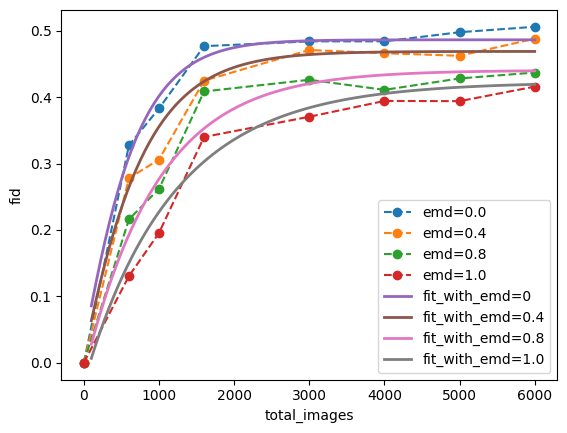

In [39]:

# python -m pytorch_fid extra/fed_emd/2024-05-09-00:19:50/emd/dst extra/fed_emd/2024-05-09-00:19:50/emd/src --device=cuda:2
# python -m pytorch_fid extra/fed_emd/2024-05-09-01:45:48/emd/dst extra/fed_emd/2024-05-09-01:45:48/emd/src --device=cuda:2
emd_data = {
    1000:
    [
        [0.0,275.60],
        [0.1,284.96],
        [0.2,283.51],
        [0.3,279.67], 
        [0.4,283.78],
        [0.5,295.02],
    ],
    2000:
    [
        [0.0,263.34], # emd_delta, fid
        [0.1,270.30],
        [0.2,272.30],
        [0.3,283.09], 
        [0.4,290.25],
        [0.5,310.25], 
    ],
    4000:
    [
        [0.0,258.24],
        [0.1,264.30],
        [0.2,268.04], 
        [0.3,270.12],
        [0.4,279.17],
        [0.5,280.81],
           
    ]
}
emd_data = {
    1000:
        [
            [0.0,138.83], # emd_delta, fid
            [0.1,141.25], 
            [0.2,139.00],
            [0.3,135.12], 
            [0.4,132.59],
            [0.5,134.4], # 121.81
        ],
    2000:
        [
            [0.0,85.56], # emd_delta, fid
            [0.1,86.34], 
            [0.2,86.72],
            [0.3,93.92], 
            [0.4,92.24],
            [0.5,89.76],
        ],
    3000:
        [
            [0.0,59.19], # emd_delta, fid
            [0.1,59.94], 
            [0.2,60.46],
            [0.3,56.50], 
            [0.4,58.75],
            [0.5,57.39],
        ],
    4000:
        [
            [0.0,57.87], # 57.87
            [0.1,57.60], # 57.60
            [0.2,56.24], # 56.24
            [0.3,57.46], # 59.06 57.46
            [0.4,64.36], # 59.83
            [0.5,63.30], # 64.42
        ]
}
emd_data = {
    1000:
        [
            [0.0,145.63], # 310.25
            [0.15,110.03], # 309.92
            [0.3,117.20], # 312.02
            [0.5, 113.59] #  312.04
        ],
    5000:
        [
            [0.0,56.49], # 
            [0.15,57.93], # 
            [0.3,66.46], # 
            [0.5,64.39] # 
        ]
        
}
# fed_mnist3
emd_data = {
    1000:
        [
            [0,134.1], 
            [2,122.11], 
            [5,130.57], 
            [9,113.25], 
        ],
    2000:
        [
            [0, 88.78], 
            [2, 77.7], 
            [5, 83.75], 
            [9, 75.26],
        ],
    4000:
        [
            [0, 66.07], 
            [2, 69.78], 
            [5, 64.31], 
            [9, 63.66],
        ]      
}
# fed_mnist4
emd_data={
    500:[
        [0,58.86],
        [1,57.88],
        [2,61.70], # redo
        [4,58.66],
    ],
    1000:[
        [0, 53.55],
        [1, 57.38],
        [2, 53.23],
        [4, 56.19],
    ],
    2000:[
        [0, 51.63],
        [1, 53.97],
        [2, 53.07],
        [4, 55.05],
    ],
    3000:[
        [0,49.16],
        [1,54.48],
        [2,56.75],
        [4,59.61],
    ],
    4000:[
        [0,49.35],
        [1,51.67],
        [2,52.64],
        [4,53.65],
    ],
    5000:[
        [0,50.9],
        [1,50.21],
        [2,53.67],
        [4,51.34],
    ]
}
# fed mnist5
emd_data={
    0: [
        [0,100],
        [2,100],
        [4,100],
        [5,100],
    ],
    600: [ 
        [0,67.26], # 61.66
        [2,72.2], # 72.93
        [4,78.41], # 72.95
        [5,86.95], # 74.05
    ],
    1000:[
        [0, 61.70], 
        [2, 69.40], 
        [4, 73.81], 
        [5, 80.45], # 73.45 trick
    ],
    1600:[
        [0,52.32],
        [2,57.51], # 61.94
        [4,59.14],
        [5,65.99], # 59.33 trick
    ],
    # 2000:[
    #     [0, 52.78], 
    #     [2, 57.36],
    #     [4, 59.02], # 63.91
    #     [5, 56.53], # 56.81
    # ],
    3000:[
        [0,51.60], # 49.91
        [2,52.90], # 59.8
        [4,57.38],  # 54.20
        [5,62.95], # trick
    ], 
    4000:[
        [0, 51.59],  # todo
        [2, 53.38],  # trick
        [4, 58.90], 
        [5, 60.57],
    ],
    5000:[
        [0,50.22],
        [2,53.77],
        [4,57.18],
        [5,60.6],
    ],
    6000:[
        [0, 49.40], 
        [2, 51.19],
        [4, 56.29],
        [5, 58.41],
    ],
    # 7000:[
    #     [0,52.91],
    #     [2,54.92],
    #     [4,51.44],
    #     [5,59.22],
    # ]
}

trans_data = {}
total_images = [k for k in emd_data.keys()]
for i in range(len(emd_data[total_images[0]])): 
    emd = emd_data[total_images[0]][i][0] * 0.2
    # print("emd:",emd)
    trans_data[emd] = []
    for total_image in total_images:
        trans_data[emd].append([total_image,1-0.01*emd_data[total_image][i][1]])
print("trans_data=",trans_data)
import matplotlib.pyplot as plt
import numpy as np
# 使用plt绘制trans_data的点图并使用曲线拟合,x轴为数据量,y轴为fid,不同曲线代表不同emd
plt.xlabel('total_images')
plt.ylabel('fid')

for emd in trans_data.keys():
    trans_data[emd] = np.array(trans_data[emd])
    plt.plot(trans_data[emd][:,0],trans_data[emd][:,1],label=f"emd={emd}",marker='o',linestyle='--')
    plt.legend()
    
    
# 编写函数拟合曲线，fid与数据量datasize和emd的关系
from scipy.optimize import curve_fit
datasizes = []
emds = []
fids = []
for emd in trans_data.keys():
    for item in trans_data[emd]:
        emds.append(emd)
        datasizes.append(item[0])
        fids.append(item[1])
print("datasizes:",datasizes)
print("emds:",emds)
print("fids:",fids)
def fit_model(inputs, k1, k2, k3, k4, k5,k6,k7):
    row_emd = np.array(inputs[:,0])
    ds = np.array(inputs[:,1])
    emd = k4 * np.exp(-((row_emd+k5)/k6)**2)
    # print("emd:",emd,"row_emd:",row_emd)
    # ret =  k1 + k2 * np.exp(-( k3 * np.power(k4 *(ds-k5), k6*emd+k7))) + k8 * emd
    # ret = k1 * np.exp(-k2*(  k3*ds - k3*emd +k5)) + k6
    ret = k7 * (emd  - k1*np.exp(-k2*np.power(k3*ds,emd)))
    return ret
emds = np.array(emds) # (,m)
datasizes = np.array(datasizes) # (,m)
inputs = np.vstack((emds,datasizes)).T
# print("input.shape=",inputs.shape)
outputs = np.array(fids)
# print("output.shape=",outputs.shape)
init_val = [
    1.04862905, # k1
    0.00855756, # k2
    0.11129809, # k3
    1.13285469, # k4
    0.36742541, # k5
    3.521752850, # k6
    0.43404247, # k7
]
popt, pcov = curve_fit(fit_model,inputs,outputs,p0=init_val,maxfev=500000)
print("popt:",popt)
# popt: [1.04862905 0.00855756 0.11129809 1.13285469 0.36742541 3.52175285 0.43404247]
emds = [0,0.4,0.8,1.0]
for emd in emds :
    datasizes = np.linspace(100,6000,100)
    inputs = np.vstack((np.array([emd]*len(datasizes)),datasizes)).T
    plt.plot(datasizes,fit_model(inputs,*popt),label=f"fit_with_emd={emd}",linestyle='-',linewidth=2)
    plt.legend()

---delta= 1 ---
[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1] [1.0] [0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111]
emd_12:1.8
emd_13:0.1999999999999999
avg emd:1.0
---delta= 2 ---
[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1] [0.5, 0.5] [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
emd_12:1.6
emd_13:0.39999999999999997
avg emd:1.0
---delta= 3 ---
[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1] [0.3333333333333333, 0.3333333333333333, 0.3333333333333333] [0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285]
emd_12:1.4
emd_13:0.6
avg emd:1.0
---delta= 4 ---
[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1] [0.25, 0.25, 0.25, 0.25] [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16